Contoh penerapan Self-Organizing Map (SOM) untuk klaterisasi menggunakan library SOMPY. Sebelum memulai, pastikan Anda telah menginstal library SOMPY. JIka dalam library tidak ditemukan SOMPY bisa menggunakan minisom. Dalam Praktikum ini akan menggunakan library MiniSom untuk implementasi SOM dengan ukuran yang lebih kecil.
instalasi SOM

In [2]:
pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10601 sha256=1b11319d4204661d45d92e6ce29ee68bccee56602bc45c0935e7a8de7dd29c32
  Stored in directory: c:\users\bima\appdata\local\pip\cache\wheels\28\e3\3d\707f393fa9013d5ab7b3ffb914ded8ca3c40dec231fa392528
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


In [3]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Gunakan dataset Iris sebagai contoh

In [4]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

Normalisasi dataset agar nilainya berada dalam rentang yang seragam.

In [5]:
# Normalisasi data
data = data / data.max(axis=0)

Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM

In [6]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

Inisialisasi bobot SOM secara acak.

In [7]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

Melatih SOM dengan data menggunakan metode train_random.

In [8]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

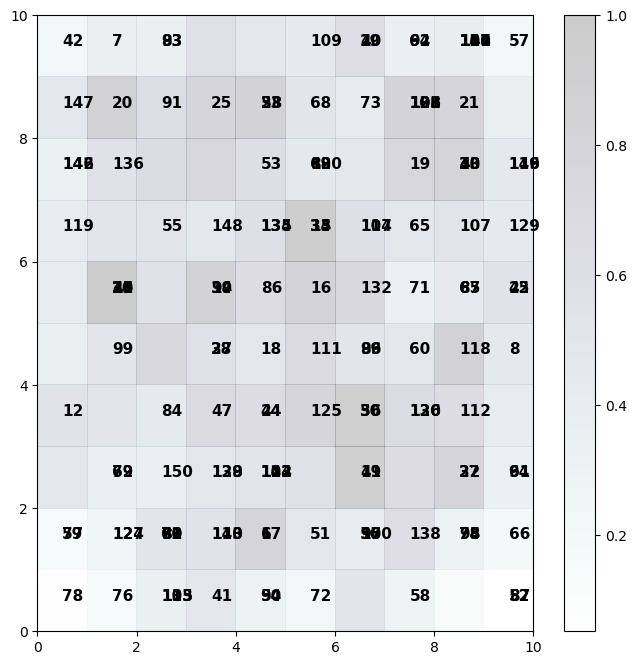

In [9]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()